In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NHL_Team_Stats=pd.read_csv("C:/Users/trent/OneDrive/Documents/Repositories/Regression-Analysis-in-Sports/data/NHL_Team_Stats.csv")
NHL_Team_R_Stats=pd.read_csv("C:/Users/trent/OneDrive/Documents/Repositories/Regression-Analysis-in-Sports/data/NHL_Team_R_Stats.csv")
NHL_Team_Stats.head()

,tricode,pp,pk,ppgf,competition_name,tid,type,win,goals_for,goals_against,game_count,team_name,win_pct,avg_gf,avg_ga
0,ANA,35,27,9.0,2010 NHL Playoff,21,3,2,19.0,22.0,6,Anaheim Ducks,0.333333,3.166667,3.666667
1,BOS,126,116,22.0,2010 NHL Playoff,20,3,16,76.0,48.0,24,Boston Bruins,0.666667,3.166667,2.000000
2,BUF,48,46,13.0,2010 NHL Playoff,17,3,3,17.0,22.0,7,Buffalo Sabres,0.428571,2.428571,3.142857
3,CHI,27,39,6.0,2010 NHL Playoff,6,3,3,22.0,16.0,7,Chicago Blackhawks,0.428571,3.142857,2.285714
4,DET,59,55,6.0,2010 NHL Playoff,18,3,7,36.0,27.0,11,Detroit Red Wings,0.636364,3.272727,2.454545


In [3]:
NHL_Team_R_Stats

,tricode,pp,pk,ppgf,competition_name,tid,type,win,goals_for,goals_against,game_count,team_name,win_pct,avg_gf,avg_ga
0,ANA,401,378,92.0,2010 NHL Regular Season,21,2,43,227.0,225.0,78,Anaheim Ducks,0.551282,2.910256,2.884615
1,ATL,338,341,35.0,2010 NHL Regular Season,11366,2,33,223.0,263.0,79,Atlanta Thrashers,0.417722,2.822785,3.329114
2,BOS,368,370,74.0,2010 NHL Regular Season,20,2,46,250.0,200.0,82,Boston Bruins,0.560976,3.048780,2.439024
3,BUF,393,364,83.0,2010 NHL Regular Season,17,2,43,251.0,235.0,82,Buffalo Sabres,0.524390,3.060976,2.865854
4,CAR,338,427,79.0,2010 NHL Regular Season,66,2,40,239.0,242.0,82,Carolina Hurricanes,0.487805,2.914634,2.951220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,TOR,256,245,58.0,2017 NHL Regular Season,1,2,47,268.0,232.0,79,Toronto Maple Leafs,0.594937,3.392405,2.936709
177,VAN,299,272,63.0,2017 NHL Regular Season,53,2,30,219.0,268.0,81,Vancouver Canucks,0.370370,2.703704,3.308642
178,VGK,257,273,64.0,2017 NHL Regular Season,59,2,50,269.0,223.0,81,Vegas Golden Knights,0.617284,3.320988,2.753086
179,WPG,307,304,69.0,2017 NHL Regular Season,4,2,51,274.0,214.0,80,Winnipeg Jets,0.637500,3.425000,2.675000


In [4]:
import statsmodels.formula.api as sm

In [5]:
# Regression for goals scored and win%
reg1 = sm.ols(formula = 'win_pct ~ goals_for', data= NHL_Team_R_Stats).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     258.2
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.52e-36
Time:                        21:47:21   Log-Likelihood:                 253.82
No. Observations:                 181   AIC:                            -503.6
Df Residuals:                     179   BIC:                            -497.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1781      0.042     -4.222      0.0

Text(0.5, 1.0, 'Relationship between Goals against and Winning Percentage')

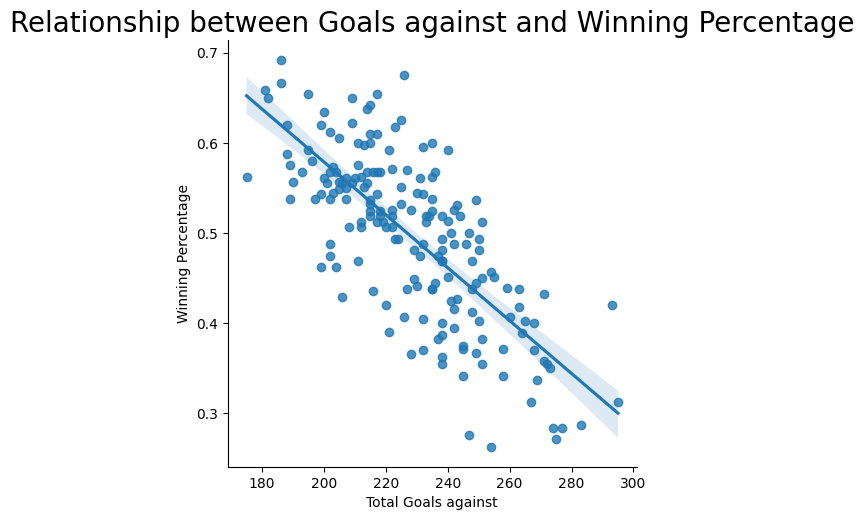

In [6]:
# Scatterplot for goals against and win%
import seaborn as sns
sns.lmplot(x='goals_against', y='win_pct',  data=NHL_Team_R_Stats)
plt.xlabel('Total Goals against')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals against and Winning Percentage", fontsize=20)

In [7]:
# Correlation between goals against and win%
NHL_Team_R_Stats['goals_against'].corr(NHL_Team_R_Stats['win_pct'])

np.float64(-0.7445117715217242)

In [8]:
# Regression for goals against and win%
reg2 = sm.ols(formula = 'win_pct ~ goals_against', data= NHL_Team_R_Stats).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           3.09e-33
Time:                        21:47:22   Log-Likelihood:                 246.15
No. Observations:                 181   AIC:                            -488.3
Df Residuals:                     179   BIC:                            -481.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1651      0.045     25.839

Text(0.5, 1.0, 'Relationship between Goals per Game and Winning Percentage')

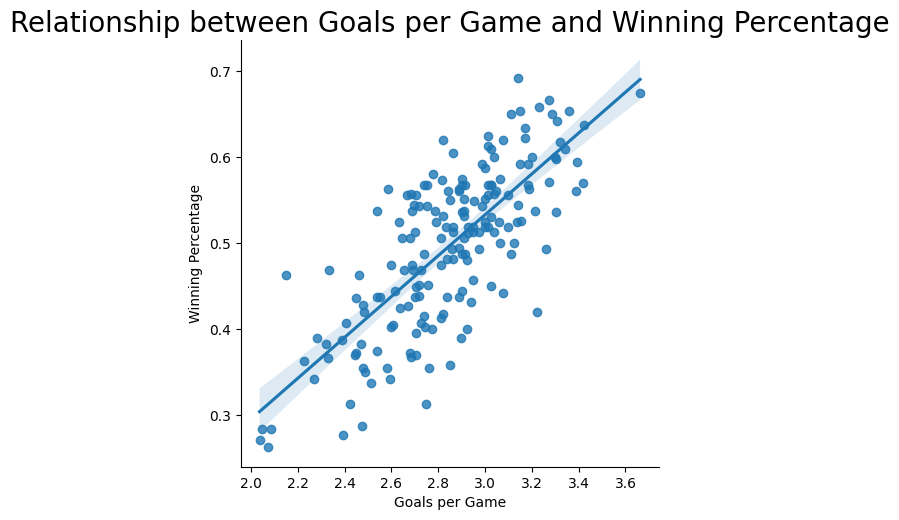

In [9]:
# Scatterplot for goals per game and win%
sns.lmplot(x='avg_gf', y='win_pct',  data=NHL_Team_R_Stats)
plt.xlabel('Goals per Game')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals per Game and Winning Percentage", fontsize=20)

In [10]:
# Regression for goals per game and win%
reg3 = sm.ols(formula = 'win_pct ~ avg_gf', data= NHL_Team_R_Stats).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     240.1
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           6.66e-35
Time:                        21:47:23   Log-Likelihood:                 250.01
No. Observations:                 181   AIC:                            -496.0
Df Residuals:                     179   BIC:                            -489.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1804      0.044     -4.111      0.0

In [ ]:
# Regression for goals per game and goals against per game with win%
reg4 = sm.ols(formula = 'win_pct ~ avg_gf+avg_ga', data= NHL_Team_R_Stats).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     985.1
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           5.39e-97
Time:                        21:47:45   Log-Likelihood:                 398.42
No. Observations:                 181   AIC:                            -790.8
Df Residuals:                     178   BIC:                            -781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4862      0.031     15.559      0.0

In [ ]:
# Convert 'type' column to categorical data type (Reg = 2, playoffs = 3)
NHL_Team_Stats['type']=NHL_Team_Stats['type'].astype(object)

In [13]:
reg5 = sm.ols(formula = 'win_pct ~ avg_gf+type', data= NHL_Team_Stats).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           6.88e-45
Time:                        21:53:22   Log-Likelihood:                 320.28
No. Observations:                 369   AIC:                            -634.6
Df Residuals:                     366   BIC:                            -622.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0197      0.035     -0.558      0.5

In [14]:
reg6 = sm.ols(formula = 'win_pct ~ avg_gf+avg_ga+type', data= NHL_Team_Stats).fit()
print(reg6.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     425.3
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          9.88e-119
Time:                        21:59:55   Log-Likelihood:                 495.08
No. Observations:                 369   AIC:                            -982.2
Df Residuals:                     365   BIC:                            -966.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4288      0.029     14.869      0.0

In [ ]:
# Regression with interaction term (goals for depends on type of game)
reg7 = sm.ols(formula = 'win_pct ~ avg_gf+type+avg_gf*type', data= NHL_Team_Stats).fit()
print(reg7.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     96.00
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           8.01e-46
Time:                        22:12:22   Log-Likelihood:                 325.08
No. Observations:                 369   AIC:                            -642.2
Df Residuals:                     365   BIC:                            -626.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1748      0.061  

In [ ]:
# Creating Pythagorean expectation
NHL_Team_Stats['pyth_pct']=((NHL_Team_Stats['goals_for']**2)/((NHL_Team_Stats['goals_for'])**2+(NHL_Team_Stats['goals_against']**2)))

Text(0.5, 1.0, 'Relationship between Pythagorean Winning Percentage and Winning Percentage')

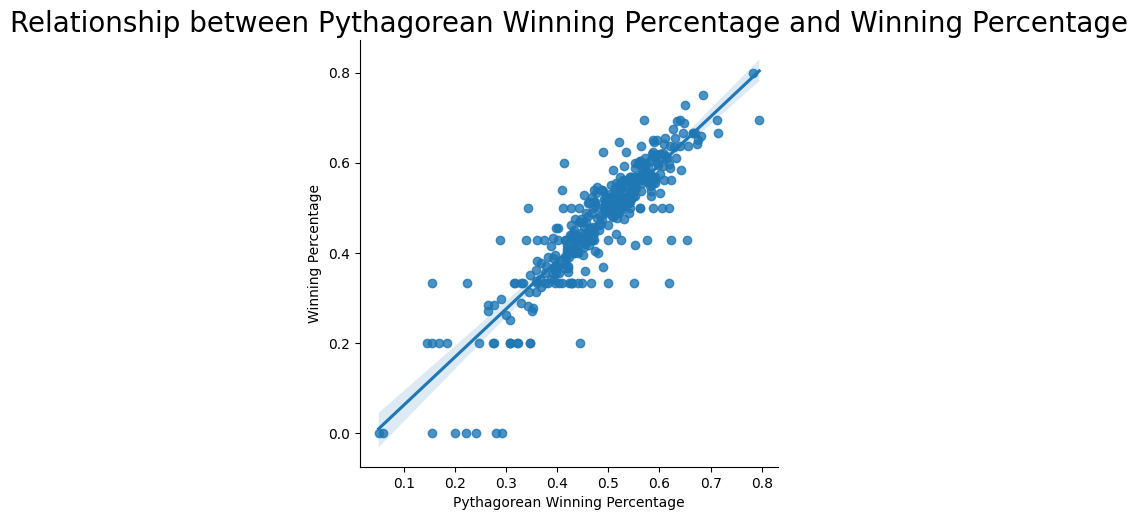

In [17]:
# Scatterplot for pythagorean win% and win%
sns.lmplot(x='pyth_pct', y='win_pct',  data=NHL_Team_Stats)
plt.xlabel('Pythagorean Winning Percentage')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Pythagorean Winning Percentage and Winning Percentage", fontsize=20)

In [18]:
# Regression with interaction term (goals for depends on type of game)
reg8 = sm.ols(formula = 'win_pct ~ pyth_pct', data= NHL_Team_Stats).fit()
print(reg8.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1297.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          1.65e-122
Time:                        22:24:03   Log-Likelihood:                 496.63
No. Observations:                 369   AIC:                            -989.3
Df Residuals:                     367   BIC:                            -981.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0447      0.015     -3.052      0.0

Text(0.5, 1.0, 'Relationship between Pythagorean Winning Percentage and Winning Percentage')

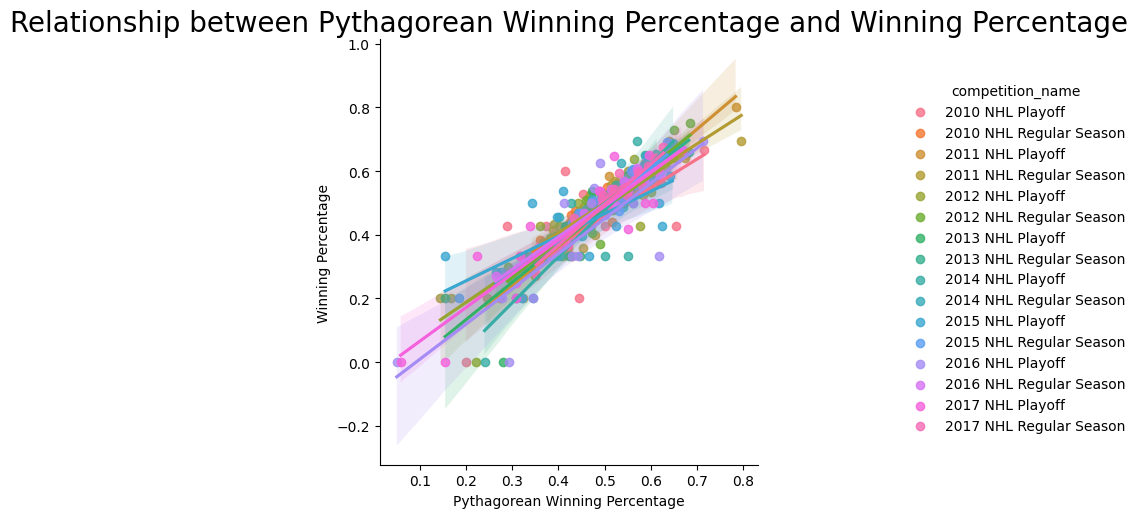

In [ ]:
# Scatterplot for pythagorean win% and win% with seperating by competition
sns.lmplot(x='pyth_pct', y='win_pct',  hue ='competition_name', data=NHL_Team_Stats)
plt.xlabel('Pythagorean Winning Percentage')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Pythagorean Winning Percentage and Winning Percentage", fontsize=20)

In [20]:
reg9 = sm.ols(formula = 'win_pct ~ pyth_pct+competition_name', data= NHL_Team_Stats).fit()
print(reg9.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     82.48
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          1.94e-108
Time:                        22:29:24   Log-Likelihood:                 505.19
No. Observations:                 369   AIC:                            -976.4
Df Residuals:                     352   BIC:                            -909.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [21]:
reg10 = sm.ols(formula = 'win_pct ~ pyth_pct+competition_name+pyth_pct*competition_name', data= NHL_Team_Stats).fit()
print(reg10.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          4.32e-101
Time:                        22:30:49   Log-Likelihood:                 520.45
No. Observations:                 369   AIC:                            -976.9
Df Residuals:                     337   BIC:                            -851.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------